# 1. Task

In [48]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [49]:
path = r'C:\Users\s.wienecke\Documents\Fortbildung\Instacart Basket Analysis'

In [50]:
# ords_prods_cust stands for orders_products_customers
ords_prods_cust= pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_merged_with_frequency_columns2.pkl'))

In [51]:
ords_prods_cust.head()

,user_id,Surname,Gender,STATE,Age,date_joined,Family Members,Family status,Income,order_id,...,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,mean_price,price_flag,median_order_frequency,order_frequency_flag,_merge
0,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,...,Mid-range product,Regularly busy,Most orders,9.0,New customer,8.205882,Low spender,20.0,Regular customer,both
1,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,...,Mid-range product,Slowest days,Most orders,9.0,New customer,8.205882,Low spender,20.0,Regular customer,both
2,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,...,Low-range product,Slowest days,Most orders,9.0,New customer,8.205882,Low spender,20.0,Regular customer,both
3,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,...,Mid-range product,Slowest days,Most orders,9.0,New customer,8.205882,Low spender,20.0,Regular customer,both
4,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2984525,...,Mid-range product,Busiest days,Most orders,9.0,New customer,8.205882,Low spender,20.0,Regular customer,both


# 2. Task

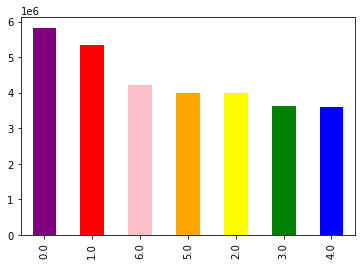

In [52]:
# bar chart with observations are ordered from largest to smallest, using colors for the plot bar
bar_odw = ords_prods_cust['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [53]:
# export
bar_odw.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow2.png'))

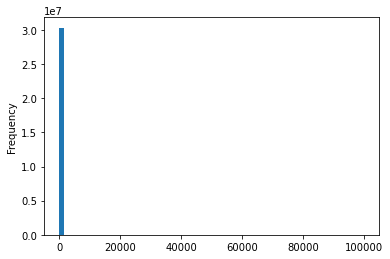

In [57]:
# creating a histogram of the “prices” column
hist_prices = ords_prods_cust['prices'].plot.hist(bins = 70)

In [65]:
# export
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices.png'))

Something doesn’t seem right here --> I should have gotten 25 bars (one for each bin). Instead, I’ve gotten one single column.

In [59]:
ords_prods_cust['prices'].describe()

count    3.032876e+07
mean     1.197725e+01
std      4.963730e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [60]:
ords_prods_cust['prices'].mean()

11.97724944169804

In [61]:
ords_prods_cust['prices'].median()

7.4

In [62]:
ords_prods_cust['prices'].max()

99999.0

Having most values between 7 and 12 (see the median and mean again) but an extreme value of 99,999 is forcing your histogram to shove all the small values into one bar and the extreme value in another one

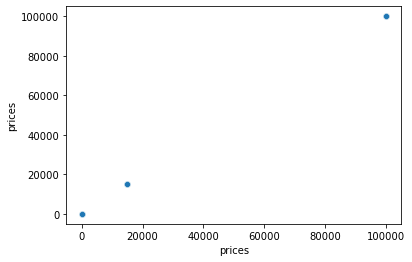

In [63]:
scatter_prices = sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_cust)

In [66]:
# export
scatter_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_prices.png'))

In [67]:
ords_prods_cust.loc[ords_prods_cust['prices'] > 100]

,user_id,Surname,Gender,STATE,Age,date_joined,Family Members,Family status,Income,order_id,...,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,mean_price,price_flag,median_order_frequency,order_frequency_flag,_merge
5256,117740,Sparks,Female,Oregon,55,1/1/2017,1,married,292759,3369785,...,High-range product,Busiest days,Most orders,85.0,Loyal customer,37.052165,High spender,4.0,Frequent customer,both
9814,31590,Sanford,Female,Montana,46,1/1/2017,0,single,154076,830157,...,High-range product,Busiest days,Most orders,39.0,Regular customer,59.676655,High spender,8.0,Frequent customer,both
26116,100958,Parsons,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,2471612,...,High-range product,Busiest days,Most orders,6.0,New customer,587.820779,High spender,11.0,Regular customer,both
26145,100958,Parsons,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,2829915,...,High-range product,Busiest days,Most orders,6.0,New customer,587.820779,High spender,11.0,Regular customer,both
26161,100958,Parsons,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,277191,...,High-range product,Regularly busy,Most orders,6.0,New customer,587.820779,High spender,11.0,Regular customer,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30551018,5519,Daniel,Female,Georgia,78,4/1/2020,3,married,262610,288789,...,High-range product,Slowest days,Most orders,54.0,Loyal customer,71.320380,High spender,7.0,Frequent customer,both
30551052,5519,Daniel,Female,Georgia,78,4/1/2020,3,married,262610,1615768,...,High-range product,Regularly busy,Most orders,54.0,Loyal customer,71.320380,High spender,7.0,Frequent customer,both
30551127,5519,Daniel,Female,Georgia,78,4/1/2020,3,married,262610,1744232,...,High-range product,Regularly busy,Most orders,54.0,Loyal customer,71.320380,High spender,7.0,Frequent customer,both
30555856,140589,Harper,Male,Maryland,26,4/1/2020,0,single,154845,1244840,...,High-range product,Regularly busy,Most orders,10.0,New customer,978.420388,High spender,20.0,Regular customer,both


In [72]:
# let’s mark them as missing since they don’t make sense in terms of the other values in the column. To turn them into NaNs
ords_prods_cust.loc[ords_prods_cust['prices'] >100, 'prices'] = np.nan

In [73]:
ords_prods_cust['prices'].max()

25.0

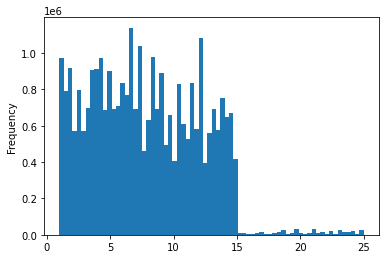

In [74]:
# increase the level of granularity in the histogram
hist_prices_without_outlier = ords_prods_cust['prices'].plot.hist(bins = 70)

In [75]:
# export
hist_prices_without_outlier.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices_without_outlier.png'))

In [76]:
np.random.seed(4)

In [77]:
# creating a list holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [78]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [79]:
np.random.rand(10)

array([9.65021495e-01, 3.21055270e-01, 5.15682008e-04, 2.61067893e-01,
       3.61849875e-01, 9.60807992e-01, 3.44509260e-01, 4.97961556e-01,
       9.49228849e-02, 3.30600019e-01])

In [80]:
# store 70% of the sample in the dataframe big
big = ords_prods_cust[dev]

In [81]:
# store 30% of the sample in the dataframe small
small = ords_prods_cust[~dev]

In [82]:
len(big) + len (small)

30563157

In [99]:
len(ords_prods_cust)

30563157

In [83]:
df_2 = small[['orders_day_of_week','prices']]

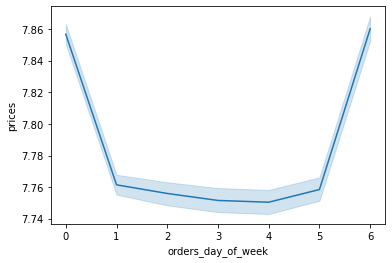

In [84]:
# create line chart
line_odw_prices = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [85]:
# export
line_odw_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_odw_prices.png'))

# 3. Task

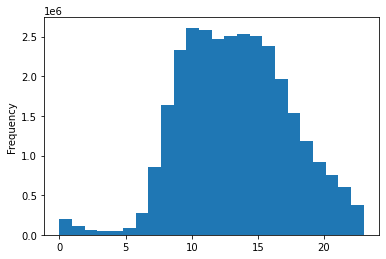

In [86]:
# create histogramm
hist_order_time = ords_prods_cust['order_time'].plot.hist(bins = 24)

In [87]:
# export
hist_order_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogramm_order_time.png'))

The histogram shows that the most orders are placed in the middle of the day.

# 4. Task

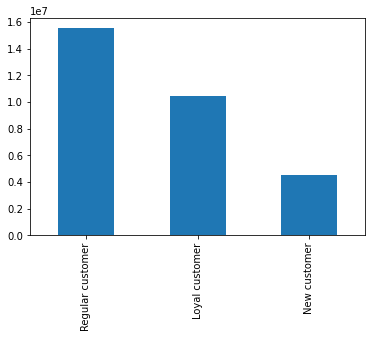

In [88]:
#create bar chart
bar_loyalty_flag = ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

In [89]:
# export
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

# 5. Task

In [90]:
df = big[['order_time','prices']]

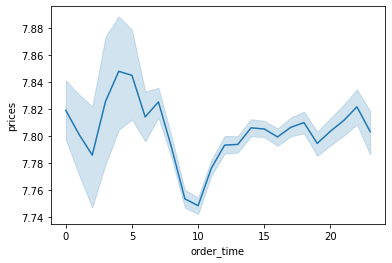

In [91]:
line_order_time_prices = sns.lineplot(data = df , x = 'order_time', y = 'prices')

In [92]:
# export
line_order_time_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_time_prices.png'))

# 6. Task

In [93]:
df3 = small[['Age', 'Family Members']]

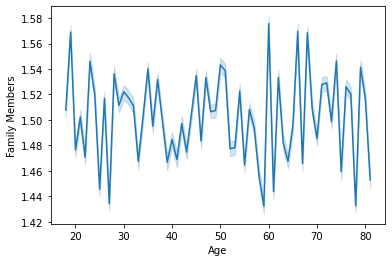

In [94]:
line_age_family_members = sns.lineplot(data = df3, x = 'Age', y = 'Family Members')

In [95]:
# export
line_age_family_members.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_family_members.png'))

The linechart shows the average number family members for customers who are the average age.

# 7. Task

In [46]:
df4 = small[['Age', 'Income']]

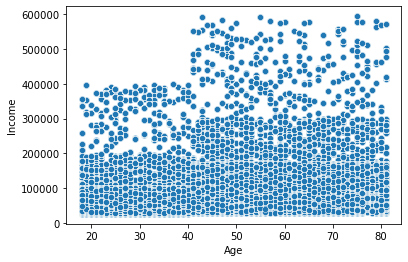

In [97]:
scatter_age_income = sns.scatterplot(data = df4, x = 'Age', y = 'Income')

In [98]:
# export
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))

There is a slight positive correlation between purchasing power (income) and age.